1、导入必要的库文件

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

pdData = pd.read_csv('LogiReg_data.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
pdData.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [17]:
pdData.shape

(100, 3)

Text(0, 0.5, 'Exam 2 Score')

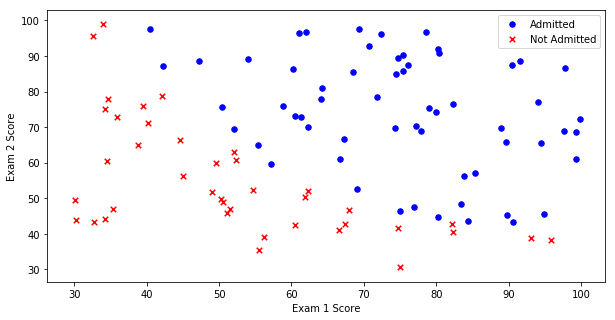

In [44]:
# 被录取的学生
positive = pdData[pdData['Admitted'] == 1] 
# 没有被录取的学生
negative = pdData[pdData['Admitted'] == 0]

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

sigmoid : 映射到概率的函数
$$
g(z) = \frac{1}{1+e^{-z}}   
$$

In [32]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [33]:
# 创建出来一系列的点
nums = np.arange(-10, 10, step=1) 

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

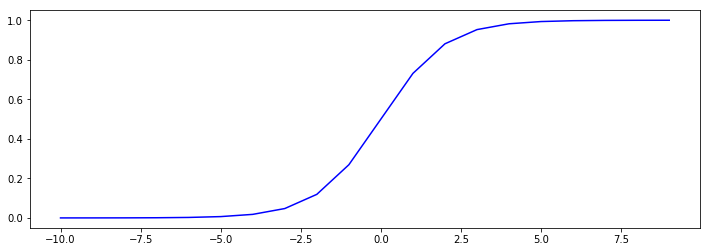

In [46]:
fig, ax = plt.subplots(figsize=(12,4))
# 测试sigmoid函数的图像输出
ax.plot(nums, sigmoid(nums), 'r')

## -----------------------------------------------------------------------------------------------------------------------------
下边这个式子 
 $$h_{\theta }\left ( x \right )=g\left ( \theta ^{T}x \right )=\frac{1}{1+e^{-\theta ^{T}x}}$$
$$\theta _{0}+\theta _{1}x_{1}+\theta _{2}x_{2}+\cdots +\theta _{n}x_{n}=\sum_{i=1}^{m}\theta _{i}x_{i}=\theta ^{T}x$$

In [52]:
def model(X, theta):
    # 相当于将上边标记中的第二个式子带入第一个式子    
    return sigmoid(np.dot(X, theta.T))

In [59]:
# 原数据插入一行x_0=1
pdData.insert(0, 'Ones', 1)
orig_data = pdData.as_matrix() # convert the Pandas representation of the data to an array useful for further computations
cols = orig_data.shape[1]

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


4

In [63]:
# X值
X = orig_data[:,0:cols-1]
# y值
y = orig_data[:,cols-1:cols]
theta = np.zeros([1, 3])

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

## --------------------------------------------------------------------------------------------------------------------------------
最大似然估计取对数
$$
l\left ( \theta  \right )=logL\left ( \theta  \right )=\sum_{i=1}^{m}\left ( y_{i}log\left ( h_{\theta }\left ( x_{i} \right ) \right ) +\left ( 1-y_{i} \right )log\left ( 1-h_{\theta }\left ( x_{i} \right ) \right ) \right )
$$
到这里就是求出使得$l\left ( \theta  \right )$最大时候的$\theta$。同样可以添加系数，得到这个式子：$J\left ( \theta  \right )=-\frac{1}{m}l\left ( \theta  \right )$利用梯度下降求出$\theta$的值。
$J\left ( \theta  \right )$可以看做损失值，当然是越小越好

In [71]:
def cost(X, y, theta):
    #翻译上边标记中的式子，算出J_𝜃的值
    left = np.multiply(y, np.log(model(X, theta)))
    right = np.multiply(1 - y, np.log(1 - model(X, theta)))
    return np.sum(left + right) / (-len(X))

In [67]:
cost(X, y, theta)

0.6931471805599453

## RODO 翻译梯度下降式子